# Métodos de Runge-Kutta para la solución de ecuaciones diferenciales

Los siguientes programas escritos en python son rutinas para la solución de las ecuaciones diferenciales que describen al circuito RLC.

```{warning}
<div align='justify'>
Es posible ejecutar el código de los bloques siguientes pero con la precaución de ejecutarlos en el orden en el que aparacen en esta página, haciendo click en el ícono del cohete, esperar a que se establezca conexión con el kernel online de python y posteriormente dando click en la pestaña RUN y posteriormente la opción Live Code.
</div>

```

In [1]:
# Importación de las librerías necesarias.
from __future__ import division, absolute_import, print_function
import csv
import array    # una variable arreglo para almacenar los datos recibidos
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets

## Método de Runge-Kutta de segundo orden

El método de Runge-Kutta para resolver la ecuación diferencial de segundo orden {eq}`RLCeq3`, que modela  al circuito RLC en la forma de espacio de estados, definido por el conjunto de ecuaciones {eq}`RLCeq4` tiene la forma:  

```{math}
:label: RKeq1
\begin{eqnarray}
	i_{L_{i+1}}&=i_{L_{i}}+h\left( \frac{1}{2}k_{11}+\frac{1}{2}k_{12} \right)\\
    v_{c_{i+1}}&=v_{c_{i}}+h\left(\frac{1}{2}k_{21}+\frac{1}{2}k_{22} \right)
	\end{eqnarray}
```
con:

```{math}
:label: RKeq2
\begin{eqnarray}
	&k_{11}=-\frac{R}{L}i_{L_{i}}-\frac{1}{L}v_{c_{i}}+\frac{1}{L}V_{s_{i}}\\
    &k_{12}=\frac{1}{C}i_{c_{i}}\\
    k_{21}&=-\frac{R}{L}(i_{L_{i}}+hk_{11})-\frac{1}{L}(v_{c_{i}}+hk_{12})+\frac{1}{L}V_{s_{i}}\\
    &k_{22}=\frac{1}{C}(i_{c_{i}}+hk_{11})
	\end{eqnarray}
```
El código siguiente, escrito en pyhton permite resolver de forma iterativa el conjunto de ecuaciones de primer orden de la representación en el espacio de estados del modelo matemático del circuito RLC serie. El paso de integación se define como $h$.

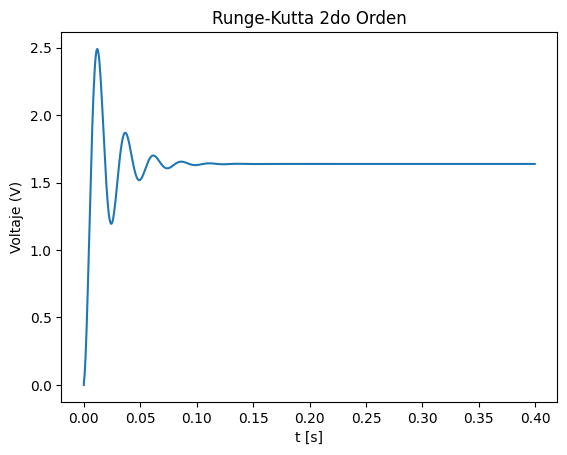

In [2]:
# Método Runge-Kutta de segundo orden
%matplotlib inline
i0=0;             
v0=0;            # Condiciones iniciales
A=0;               
U0=A;              
R = 1570; 
L =15.02;         #Valores de resistencia R, capacitancia C e inductancia L
C =10.0**(-6);  

h=1/2000;          # Ancho del paso 
N=int(0.4/h);       # Número total de pasos

i2=np.empty([N+1],dtype=float);
v2=np.empty([N+1],dtype=float);

tr=np.empty([N+1],dtype=float);
U=np.empty([N+1],dtype=float);

tr[0]=0;         # 
i2[0]=i0;

# Condiciones iniciales
v2[0]=v0;
U[0]=U0;

n=0

for n in range(N):
        tr[n+1]=n*h;
        U[n]=1.638;
        U[n+1]=1.638;
        # método RK2 
        k11=-R/L*i2[n]-1/L*v2[n]+1/L*U[n];  # Método de Runge Kutta de segundo orden
        k12=1/C*i2[n];                      # Cálculo de los coeficientes.  
    
        k21=-R/L*(i2[n]+h*k11)-1/L*(v2[n]+h*k12)+1/L*U[n];
        k22=1/C*(i2[n]+h*k11);
    
        i2[n+1]=i2[n]+h*(0.5*k11+0.5*k21);
        v2[n+1]=v2[n]+h*(0.5*k12+0.5*k22);

        n=n+1;
  
plt.plot(tr,v2)

plt.title('V(t)')
plt.xlabel('t [s]')              # Se grafican los resultados 
plt.ylabel('Voltaje (V)')
plt.title("Runge-Kutta 2do Orden");



## Método de Runge-Kutta de tercer orden
%matplotlib inline
En el caso del método de Runge-Kutta de tercer orden, las ecuaciones a iterar son las siguientes:  

```{math}
:label: RKeq3
\begin{eqnarray}
	i_{L_{i+1}}&=i_{L_{i}}+\frac{1}{6}\left( k_{11}+4k_{21} +k_{31}\right)h\\
    v_{c_{i+1}}&=v_{c_{i}}+\frac{1}{6}\left( k_{12}+4k_{22} +k_{32}\right)h
	\end{eqnarray}
```
con:

```{math}
:label: RKeq4
\begin{eqnarray}
	&k_{11}=-\frac{R}{L}i_{L_{i}}-\frac{1}{L}v_{c_{i}}+\frac{1}{L}V_{s_{i}}\\
    &k_{12}=\frac{1}{C}i_{L_{i}}\\
    k_{21}&=-\frac{R}{L}(i_{L_{i}}+0.5h)-\frac{1}{L}(v_{c_{i}}+0.5hk_{11})+\frac{1}        {L}V_{s_{i}}\\
    &k_{22}=\frac{1}{C}(i_{L_{i}}+0.5h)\\
        k_{31}&=-\frac{R}{L}(i_{L_{i}}+h)-\frac{1}{L}(v_{c_{i}}-hk_{11}+2k_{21}h)+\frac{1}        {L}V_{s_{i}}\\
    &k_{32}=\frac{1}{C}(i_{L_{i}}+h)\\
	\end{eqnarray}
```
El código siguiente, escrito en pyhton permite resolver de forma iterativa el conjunto de ecuaciones de primer orden de la representación en el espacio de estados del modelo matemático del circuito RLC serie. El paso de integación se define como $h$.

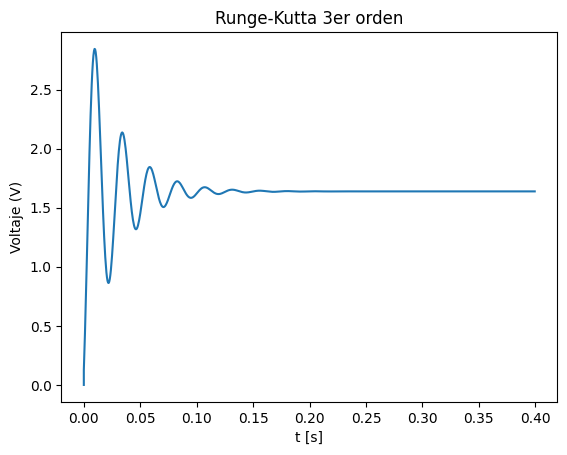

In [3]:
# Método Runge-Kutta de tercer orden
%matplotlib inline
i0=0;            #
v0=0;            # Condiciones iniciales
A=0;             # 
U0=A;            # 
R = 1570; 
L =15.02;
C =10.0**(-6);  

h=1/2000;         # Ancho del paso 
N=int(0.4/h);    # Número total de pasos

i3=np.empty([N+1],dtype=float);
v3=np.empty([N+1],dtype=float);

tr=np.empty([N+1],dtype=float);
U=np.empty([N+1],dtype=float);

i3[0]=i0;
# Condiciones iniciales
v3[0]=v0;
# 
U[0]=U0;

n=0

for n in range(N):
        tr[n+1]=n*h;
        U[n]=1.638;
        U[n+1]=1.638;

        # método RK3 
        k11=-R/L*i3[n]-1/L*v3[n]+1/L*U[n];
        k12=1/C*i3[n];

        k21=-R/L*(i3[n]+0.5*h)-1/L*(v3[n]+0.5*h*k11)+1/L*U[n];
        k22=1/C*(i3[n]+0.5*h);

        k31=-R/L*(i3[n]+h)-1/L*(v3[n]-h*k11+2*k21*h)+1/L*U[n];
        k32=1/C*(i3[n]+h);
    
        i3[n+1]=i3[n]+(1/6)*h*(k11+4*k21+k31);
        v3[n+1]=v3[n]+(1/6)*h*(k12+4*k22+k32);

        n=n+1;
  
plt.plot(tr,v3)

plt.title('V(t)')
plt.xlabel('t [s]')
plt.ylabel('Voltaje (V)')
plt.title("Runge-Kutta 3er orden");



## Método de Runge-Kutta de cuarto orden

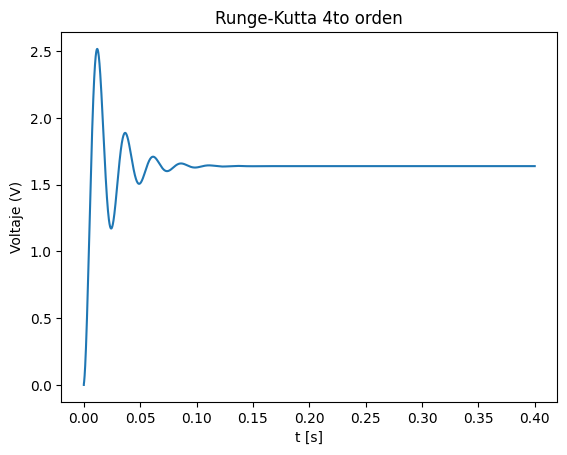

In [4]:
%matplotlib inline
i0=0;            #
v0=0;            # Condiciones iniciales
A=0;             # 
U0=A;            # 
R = 1570; 
L =15.02;
C =10.0**(-6);  

h=1/10000;         # Ancho del paso 
N=int(0.4/h);    # Número total de pasos



i4=np.empty([N+1],dtype=float);
v4=np.empty([N+1],dtype=float);

tr=np.empty([N+1],dtype=float);
U=np.empty([N+1],dtype=float);

tr[0]=0;         # 
i4[0]=i0;
# Condiciones iniciales
v4[0]=v0;
# 
U[0]=U0;


n=0
for n in range(N):
        tr[n+1]=n*h;
        U[n]=1.638;
        U[n+1]=1.638;

        # método RK4 
        k11=-R/L*i4[n]-1/L*v4[n]+1/L*U[n];
        k12=1/C*i4[n];

        k21=-R/L*(i4[n]+0.5*h)-1/L*(v4[n]+0.5*h*k12)+1/L*U[n];
        k22=1/C*(i4[n]+0.5*h);

        k31=-R/L*(i4[n]+0.5*h)-1/L*(v4[n]+0.5*h*k22)+1/L*U[n];
        k32=1/C*(i4[n]+h*0.5);
    
        k41=-R/L*(i4[n]+h)-1/L*(v4[n]+h*k32)+1/L*U[n];
        k42=1/C*(i4[n]+h);


        i4[n+1]=i4[n]+(1/6)*h*(k11+2*k21+2*k31+k41);
        v4[n+1]=v4[n]+(1/6)*h*(k12+2*k22+2*k32+k42);

        n=n+1;
  
plt.plot(tr,v4)

plt.title('V(t)');
plt.xlabel('t [s]');
plt.ylabel('Voltaje (V)');
plt.title("Runge-Kutta 4to orden");


## Comparación de tres órdenes del método Runge-Kutta

In [5]:
%matplotlib inline

def f(fs,R,C,L):

    i0=0;            #
    v0=0;            # Condiciones iniciales
    A=0;             # 
    U0=A;            # 
    #R = 1600;
    #R = 1570; 
    #L =15.02;
    C =C*(10.0**(-6));  

    h=1/fs;         # Ancho del paso 
    N=int(0.4/h);    # Número total de pasos

    i2=np.empty([N+1],dtype=float);
    v2=np.empty([N+1],dtype=float);

    i3=np.empty([N+1],dtype=float);
    v3=np.empty([N+1],dtype=float);

    i4=np.empty([N+1],dtype=float);
    v4=np.empty([N+1],dtype=float);

    tr=np.empty([N+1],dtype=float);
    U=np.empty([N+1],dtype=float);

    tr[0]=0;         # 
    i2[0]=i0;
    i3[0]=i0;
    i4[0]=i0;
# Condiciones iniciales
    v2[0]=v0;
    v3[0]=v0;
    v4[0]=v0;
# 
    U[0]=U0;


    n=0
    for n in range(N):
        tr[n+1]=n*h;
        U[n]=1.638;
        U[n+1]=1.638;
        #U[n]=1.598;
        #U[n+1]=1.598
        # método RK2 
        k11=-R/L*i2[n]-1/L*v2[n]+1/L*U[n];
        k12=1/C*i2[n];
    
        k21=-R/L*(i2[n]+h*k11)-1/L*(v2[n]+h*k12)+1/L*U[n];
        k22=1/C*(i2[n]+h*k11);
    
        i2[n+1]=i2[n]+h*(0.5*k11+0.5*k21);
        v2[n+1]=v2[n]+h*(0.5*k12+0.5*k22);
        #i2[n+1]=i2[n]+h*((1/3)*k11+(2/3)*k21);
        #v2[n+1]=v2[n]+h*((1/3)*k12+(2/3)*k22);

        # método RK3 
        k11=-R/L*i3[n]-1/L*v3[n]+1/L*U[n];
        k12=1/C*i3[n];

        k21=-R/L*(i3[n]+0.5*h)-1/L*(v3[n]+0.5*h*k11)+1/L*U[n];
        k22=1/C*(i3[n]+0.5*h);

        k31=-R/L*(i3[n]+h)-1/L*(v3[n]-h*k11+2*k21*h)+1/L*U[n];
        k32=1/C*(i3[n]+h);
    
        i3[n+1]=i3[n]+(1/6)*h*(k11+4*k21+k31);
        v3[n+1]=v3[n]+(1/6)*h*(k12+4*k22+k32);

        # método RK4 
        k11=-R/L*i4[n]-1/L*v4[n]+1/L*U[n];
        k12=1/C*i4[n];

        k21=-R/L*(i4[n]+0.5*h)-1/L*(v4[n]+0.5*h*k12)+1/L*U[n];
        k22=1/C*(i4[n]+0.5*h);

        k31=-R/L*(i4[n]+0.5*h)-1/L*(v4[n]+0.5*h*k22)+1/L*U[n];
        k32=1/C*(i4[n]+h*0.5);
    
        k41=-R/L*(i4[n]+h)-1/L*(v4[n]+h*k32)+1/L*U[n];
        k42=1/C*(i4[n]+h);


        i4[n+1]=i4[n]+(1/6)*h*(k11+2*k21+2*k31+k41);
        v4[n+1]=v4[n]+(1/6)*h*(k12+2*k22+2*k32+k42);

        n=n+1;
  
    plt.plot(tr,v2)
    plt.plot(tr,v3)
    plt.plot(tr,v4)

    plt.title('V(t)')
    plt.xlabel('t [s]')
    plt.ylabel('Voltaje (V)')
    plt.legend(["Runge-Kutta 2","Runge-Kutta 3","Runge-Kutta 4"], numpoints=1,loc=0);

    #return(R)
#n=0
#for n in range(4):
#    interact(f,fs=2000, R=1200+n*100,C=1.2,L=15.3);
#    time.sleep(0.5)
#    n=n+1;

interact(f,fs=widgets.FloatSlider(min=100,max=20000,step=10,value=10000), R=widgets.IntSlider(min=120,max=8000,step=10,value=1570),C=widgets.FloatSlider(min=1,max=100,step=1.1,value=1),L=widgets.FloatSlider(min=1,max=30,step=1.1,value=15.02));


interactive(children=(FloatSlider(value=10000.0, description='fs', max=20000.0, min=100.0, step=10.0), IntSlid…

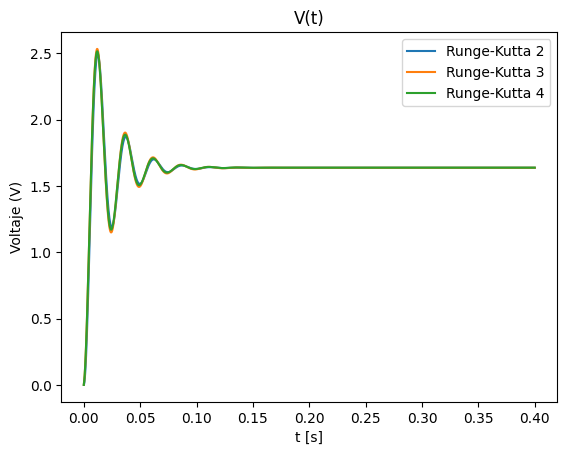

In [6]:
%matplotlib inline

R = 1570; 
L =15.02;
C =10.0**(-6);  
fs=10000
    

i0=0;            #
v0=0;            # Condiciones iniciales
A=0;             # 
U0=A;            # 
C=C*(1.0**(-6)); 
 

h=1/fs;         # Ancho del paso 
N=int(0.4/h);    # Número total de pasos

i2=np.empty([N+1],dtype=float);
v2=np.empty([N+1],dtype=float);

i3=np.empty([N+1],dtype=float);
v3=np.empty([N+1],dtype=float);

i4=np.empty([N+1],dtype=float);
v4=np.empty([N+1],dtype=float);

tr=np.empty([N+1],dtype=float);
U=np.empty([N+1],dtype=float);

tr[0]=0;         # 
i2[0]=i0;
i3[0]=i0;
i4[0]=i0;
# Condiciones iniciales
v2[0]=v0;
v3[0]=v0;
v4[0]=v0;
# 
U[0]=U0;


n=0
for n in range(N):
        tr[n+1]=n*h;
        U[n]=1.638;
        U[n+1]=1.638;
        #U[n]=1.598;
        #U[n+1]=1.598
        # método RK2 
        k11=-R/L*i2[n]-1/L*v2[n]+1/L*U[n];
        k12=1/C*i2[n];
    
        k21=-R/L*(i2[n]+h*k11)-1/L*(v2[n]+h*k12)+1/L*U[n];
        k22=1/C*(i2[n]+h*k11);
    
        i2[n+1]=i2[n]+h*(0.5*k11+0.5*k21);
        v2[n+1]=v2[n]+h*(0.5*k12+0.5*k22);
        #i2[n+1]=i2[n]+h*((1/3)*k11+(2/3)*k21);
        #v2[n+1]=v2[n]+h*((1/3)*k12+(2/3)*k22);

        # método RK3 
        k11=-R/L*i3[n]-1/L*v3[n]+1/L*U[n];
        k12=1/C*i3[n];

        k21=-R/L*(i3[n]+0.5*h)-1/L*(v3[n]+0.5*h*k11)+1/L*U[n];
        k22=1/C*(i3[n]+0.5*h);

        k31=-R/L*(i3[n]+h)-1/L*(v3[n]-h*k11+2*k21*h)+1/L*U[n];
        k32=1/C*(i3[n]+h);
    
        i3[n+1]=i3[n]+(1/6)*h*(k11+4*k21+k31);
        v3[n+1]=v3[n]+(1/6)*h*(k12+4*k22+k32);

        # método RK4 
        k11=-R/L*i4[n]-1/L*v4[n]+1/L*U[n];
        k12=1/C*i4[n];

        k21=-R/L*(i4[n]+0.5*h)-1/L*(v4[n]+0.5*h*k12)+1/L*U[n];
        k22=1/C*(i4[n]+0.5*h);

        k31=-R/L*(i4[n]+0.5*h)-1/L*(v4[n]+0.5*h*k22)+1/L*U[n];
        k32=1/C*(i4[n]+h*0.5);
    
        k41=-R/L*(i4[n]+h)-1/L*(v4[n]+h*k32)+1/L*U[n];
        k42=1/C*(i4[n]+h);


        i4[n+1]=i4[n]+(1/6)*h*(k11+2*k21+2*k31+k41);
        v4[n+1]=v4[n]+(1/6)*h*(k12+2*k22+2*k32+k42);

        n=n+1;
  
plt.plot(tr,v2)
plt.plot(tr,v3)
plt.plot(tr,v4)

plt.title('V(t)')
plt.xlabel('t [s]')
plt.ylabel('Voltaje (V)')
plt.legend(["Runge-Kutta 2","Runge-Kutta 3","Runge-Kutta 4"], numpoints=1,loc=0);

